In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import timm
# Prepare tea leaf disease test dataset
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
from google.colab import drive

In [ ]:
# Define a simple Vision Transformer model for image classification
class VisionTransformer(nn.Module):
    def __init__(self, num_classes):
        super(VisionTransformer, self).__init__()
        self.model = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.model.head = nn.Linear(self.model.head.in_features, num_classes)

    def forward(self, x):
        return self.model(x)

# Prepare tea leaf disease dataset
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
drive.mount('/content/drive')
test_dataset = datasets.ImageFolder(root='/content/drive/My Drive/Tea Leaf Disease Datasets/val', transform=data_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
save_path = '/content/drive/My Drive/Colab Notebooks/new_tea_leaf_disease_classifier.pth'
# Loading the saved model using:
# Initialize model, loss function, and optimizer
# model = VisionTransformer(num_classes=len(test_dataset.classes))
# model.load_state_dict(torch.load(save_path))
# model.to(device)
device = torch.device('cpu')
model.load_state_dict(torch.load(save_path, map_location=device))

<All keys matched successfully>

Accuracy: 0.9804
Precision: 0.9810
Recall: 0.9804
F1 Score: 0.9804

Classification Report:
               precision    recall  f1-score   support

   Algal Leaf       0.98      1.00      0.99       200
 Brown Blight       0.94      0.99      0.97       173
  Gray Blight       0.99      0.94      0.97       200
      Healthy       0.97      0.99      0.98       200
   Helopeltis       1.00      0.96      0.98       200
Red Leaf Spot       1.00      0.99      0.99       200

     accuracy                           0.98      1173
    macro avg       0.98      0.98      0.98      1173
 weighted avg       0.98      0.98      0.98      1173



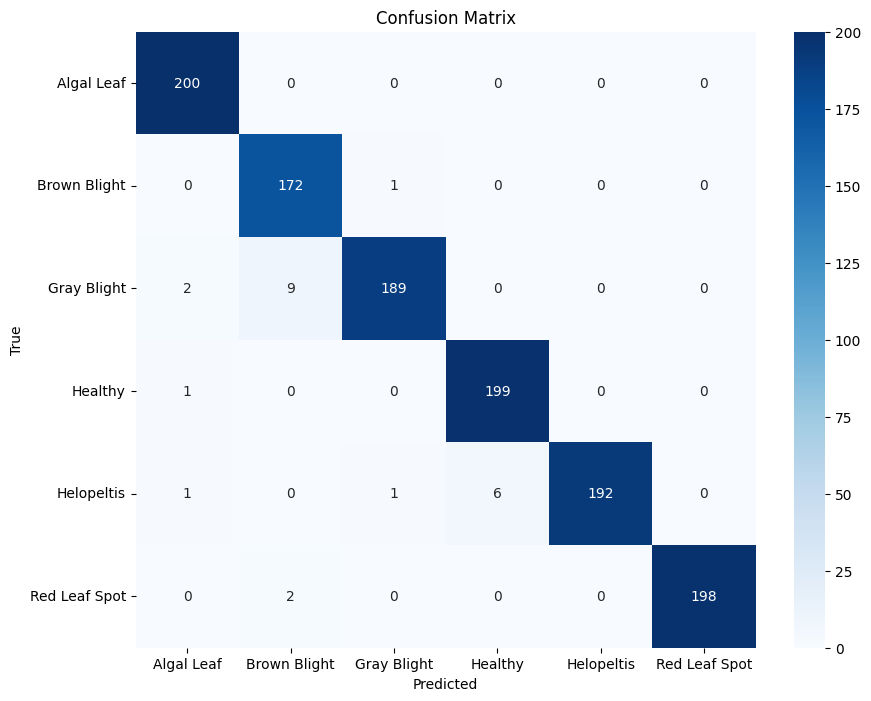

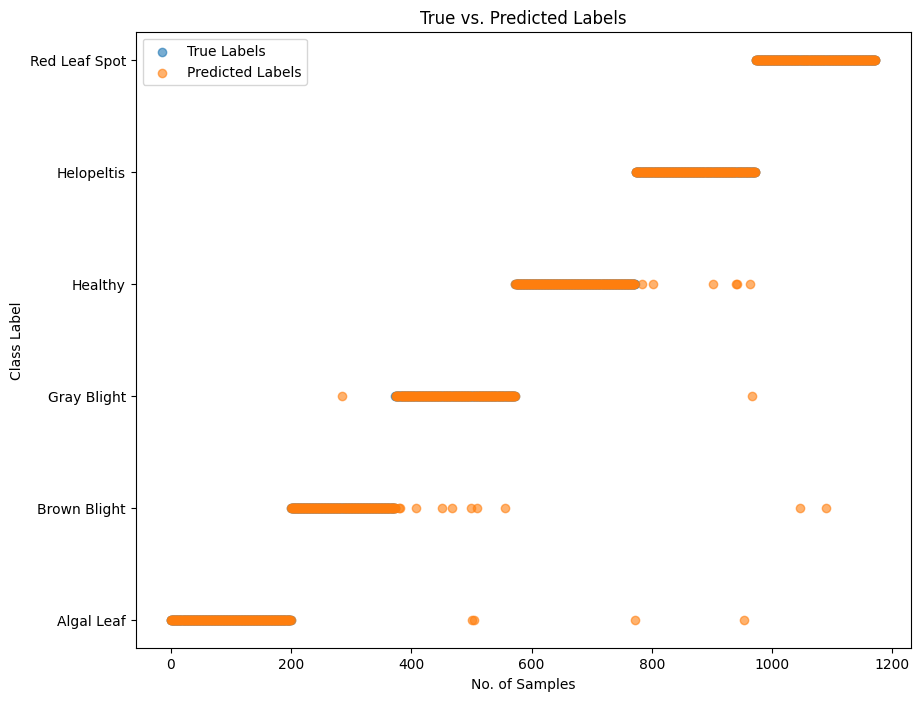

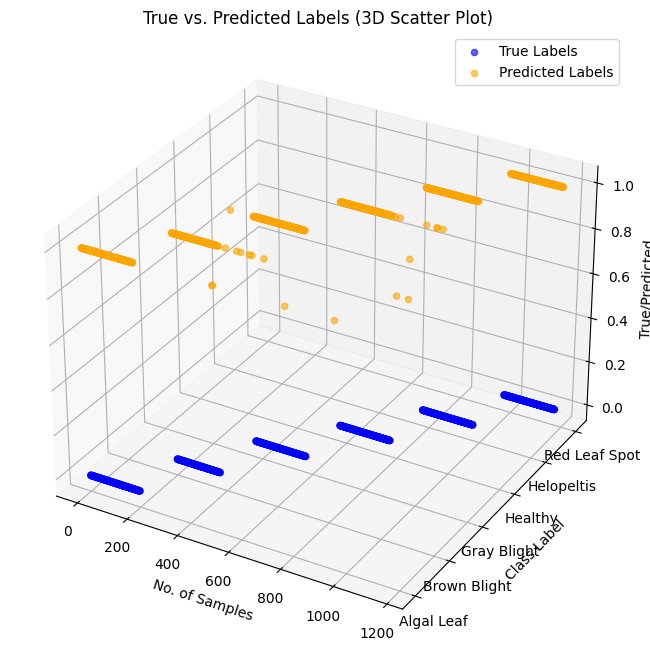

In [ ]:

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')

print(f'Accuracy: {accuracy :.4f}')
print(f'Precision: {precision :.4f}')
print(f'Recall: {recall :.4f}')
print(f'F1 Score: {f1 :.4f}')

# Print the classification report
print('\nClassification Report:')
print(classification_report(all_labels, all_preds, target_names = test_dataset.classes))


# Calculate confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = test_dataset.classes

# Plot confusion matrix with non-overlapping x-tick labels
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Confusion Matrix')

# Optionally, save the confusion matrix plot
plt.savefig('confusion_matrix.png')
plt.show()

# Plot True vs. Predicted Labels
plt.figure(figsize=(10, 8))
plt.scatter(range(len(all_labels)), all_labels, alpha=0.6, label='True Labels')
plt.scatter(range(len(all_preds)), all_preds, alpha=0.6, label='Predicted Labels')
plt.legend()
plt.xlabel('No. of Samples')
plt.ylabel('Class Label')
plt.yticks(np.arange(len(class_names)), class_names)
plt.title('True vs. Predicted Labels')

# Optionally, save the True vs. Predicted Labels plot
plt.savefig('true_vs_predicted_labels.png')
plt.show()

# Plot True vs. Predicted Labels in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
ax.scatter(range(len(all_labels)), all_labels, zs=0, zdir='z', label='True Labels', c='blue', alpha=0.6)
ax.scatter(range(len(all_preds)), all_preds, zs=1, zdir='z', label='Predicted Labels', c='orange', alpha=0.6)

ax.set_xlabel('No. of Samples')
ax.set_ylabel('Class Label')
ax.set_zlabel('True/Predicted')
ax.set_yticks(np.arange(len(class_names)), class_names)
ax.set_title('True vs. Predicted Labels (3D Scatter Plot)')
ax.legend()

# Optionally, save the True vs. Predicted Labels plot
plt.savefig('true_vs_predicted_labels_3d.png')

plt.show()



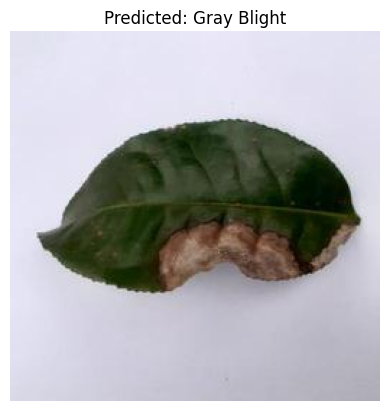

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Function to predict and visualize the class of a single image
def predict_and_visualize(image_path, model, transform, class_names):
    model.eval()
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)

    predicted_class = class_names[predicted.item()]

    # Visualize the image and the predicted label
    plt.imshow(image)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.savefig('/content/drive/My Drive/outputViT.png')
    plt.show()

# Define the class names based on the dataset's subdirectory names
class_names = test_dataset.classes

# Example usage with an image path
image_path = '/content/drive/My Drive/Tea Leaf Test/gray light/20211227_164018.jpg'
predict_and_visualize(image_path, model, data_transform, class_names)
